#Preprocessing - coswara datasets

In [1]:
import os
import sys
import subprocess
import numpy as np
# import glob
import json
import pandas as pd
import shutil
import librosa.display
# from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import csv
import IPython.display as ipd
import random

In [3]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimsunhee","key":"760bb6767adea223cb640e0db16237a5"}'}

In [4]:
ls -1ha kaggle.json

kaggle.json


In [5]:
ls

kaggle.json  sample_data/


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         50           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         74           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        605           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        106           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1136           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13130           False  
house-pr

In [7]:
!kaggle datasets download -d sarabhian/coswara-dataset-heavy-cough

 98% 617M/632M [00:32<00:00, 21.3MB/s]
100% 632M/632M [00:32<00:00, 20.2MB/s]


In [8]:
ls

coswara-dataset-heavy-cough.zip  kaggle.json  sample_data/


In [9]:
!unzip coswara-dataset-heavy-cough.zip

Archive:  coswara-dataset-heavy-cough.zip
  inflating: coswara_data/kaggle_data/00xKcQMmcAhX8CODgBBLOe7Dm0T2/cough.wav  
  inflating: coswara_data/kaggle_data/01OCEf1yB4czsq8ygRoT51s96Ba2/cough.wav  
  inflating: coswara_data/kaggle_data/01n0u9YSkXQSkmN45J65eigyCMC3/cough.wav  
  inflating: coswara_data/kaggle_data/03TmwzsdEBVEh35MRMbC9d0NnfI3/cough.wav  
  inflating: coswara_data/kaggle_data/05acPS4aRGfvuOfku11Za8zve8i2/cough.wav  
  inflating: coswara_data/kaggle_data/05bieNLXPuaIWEVaX81EkbbjVrh1/cough.wav  
  inflating: coswara_data/kaggle_data/08tlSbvXpAggZavIGW994adhh1m1/cough.wav  
  inflating: coswara_data/kaggle_data/0B1rE91KabdId1lUmWJB7NLg8OP2/cough.wav  
  inflating: coswara_data/kaggle_data/0EAAFsDWfTcrhktHy78LS6nf19G3/cough.wav  
  inflating: coswara_data/kaggle_data/0HIgO2EhOOW1msCbEw1kC8Qsx6D3/cough.wav  
  inflating: coswara_data/kaggle_data/0Ha52POVIxTKEPqI1eGpIoMHUd52/cough.wav  
  inflating: coswara_data/kaggle_data/0Js6ZUZQ9NUnu568Fh7B6mZ1R8o1/cough.wav  
  inflatin

In [10]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
data_path = "/content/coswara_data/kaggle_data"
csvs_path = "./csvs"

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
hcough_files =[]
for dirpath, subdirs, files in os.walk(data_path):
#     print(files)
    hcough_files.extend(os.path.join(dirpath, x) for x in files if os.path.isfile(os.path.join(dirpath, x)))
print("total files :" ,len(hcough_files)) 
print("path of file at loc [0] :" ,hcough_files[0]) # path of file
print("id of file at loc[0]",hcough_files[0][-38:-10] )# id of each file

dff = pd.DataFrame(columns=['id','path'])
dff['path']=hcough_files 
dff['id'] = dff.path.apply(lambda x: x[-38:-10])
dff.head()

total files : 2313
path of file at loc [0] : /content/coswara_data/kaggle_data/pbXQf83tO4bPFQ0UZjs9HDE7i7r1/cough.wav
id of file at loc[0] pbXQf83tO4bPFQ0UZjs9HDE7i7r1


id  \
0  pbXQf83tO4bPFQ0UZjs9HDE7i7r1   
1  pOZwqBg4NsVYWASmwwhXFq4UlpC2   
2  ose5fZhlJWV7qalryF6Nvp3kY482   
3  sjRWRFsE64R2o0ZFdGJe8PlWwlM2   
4  0Ha52POVIxTKEPqI1eGpIoMHUd52   

                                                path  
0  /content/coswara_data/kaggle_data/pbXQf83tO4bP...  
1  /content/coswara_data/kaggle_data/pOZwqBg4NsVY...  
2  /content/coswara_data/kaggle_data/ose5fZhlJWV7...  
3  /content/coswara_data/kaggle_data/sjRWRFsE64R2...  
4  /content/coswara_data/kaggle_data/0Ha52POVIxTK...

In [14]:
#check the file
data = librosa.load(dff.path.loc[1],sr = 22050)
ipd.Audio(dff.path.loc[1])

In [15]:
csv_files =[]
for dirpath, subdirs, files in os.walk(csvs_path):
    csv_files.extend(os.path.join(dirpath, x) for x in files if x.endswith(".csv"))
csv_files

['./csvs/20200415.csv',
 './csvs/20200416.csv',
 './csvs/20200424.csv',
 './csvs/20201130.csv',
 './csvs/20200418.csv',
 './csvs/20200525.csv',
 './csvs/20200430.csv',
 './csvs/20210406.csv',
 './csvs/20200911.csv',
 './csvs/20210830.csv',
 './csvs/20210507.csv',
 './csvs/20200417.csv',
 './csvs/20200720.csv',
 './csvs/20200820.csv',
 './csvs/20220116.csv',
 './csvs/20210206.csv',
 './csvs/20200824.csv',
 './csvs/20200604.csv',
 './csvs/20200413.csv',
 './csvs/20210523.csv',
 './csvs/20210603.csv',
 './csvs/20210618.csv',
 './csvs/20200504.csv',
 './csvs/20201031.csv',
 './csvs/20210714.csv',
 './csvs/20210426.csv',
 './csvs/20200419.csv',
 './csvs/20200919.csv',
 './csvs/20210930.csv',
 './csvs/20210630.csv',
 './csvs/20200814.csv',
 './csvs/20200803.csv',
 './csvs/20210816.csv',
 './csvs/20210419.csv',
 './csvs/20201012.csv',
 './csvs/20200505.csv',
 './csvs/20200901.csv',
 './csvs/20200930.csv',
 './csvs/20210914.csv',
 './csvs/20200707.csv',
 './csvs/20200502.csv',
 './csvs/2020122

In [16]:
pwd

'/content'

In [17]:
print("total present csvs :", len(os.listdir(csvs_path)))

total present csvs : 42


In [18]:
all_files=[]
for files in os.listdir(csvs_path):
    if files[-3:]=="csv":
        all_files.append(files)
all_files.sort()
all_files

['20200413.csv',
 '20200415.csv',
 '20200416.csv',
 '20200417.csv',
 '20200418.csv',
 '20200419.csv',
 '20200424.csv',
 '20200430.csv',
 '20200502.csv',
 '20200504.csv',
 '20200505.csv',
 '20200525.csv',
 '20200604.csv',
 '20200707.csv',
 '20200720.csv',
 '20200803.csv',
 '20200814.csv',
 '20200820.csv',
 '20200824.csv',
 '20200901.csv',
 '20200911.csv',
 '20200919.csv',
 '20200930.csv',
 '20201012.csv',
 '20201031.csv',
 '20201130.csv',
 '20201221.csv',
 '20210206.csv',
 '20210406.csv',
 '20210419.csv',
 '20210426.csv',
 '20210507.csv',
 '20210523.csv',
 '20210603.csv',
 '20210618.csv',
 '20210630.csv',
 '20210714.csv',
 '20210816.csv',
 '20210830.csv',
 '20210914.csv',
 '20210930.csv',
 '20220116.csv']

In [19]:
os.chdir(csvs_path)

df_list =[]
for i in range(len(all_files)):
    temp_df = pd.read_csv(all_files[i])
    df_list.append(temp_df)
df = pd.concat(df_list, ignore_index=True, sort=False)
df.head()

id    l_c   a record_date covid_status    iF ep  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2  India  24  2020-04-13      healthy  True  y   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2  India  72  2020-04-13      healthy  True  y   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2  India  54  2020-04-13      healthy  True  y   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2  India  31  2020-04-13      healthy  True  y   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2  India  26  2020-04-13      healthy  True  y   

      g          l_s   dT  ... test_status diarrhoea ctScan vacc testType  \
0  male    Karnataka  web  ...         NaN       NaN    NaN  NaN      NaN   
1  male  Maharashtra  web  ...         NaN       NaN    NaN  NaN      NaN   
2  male  Maharashtra  web  ...         NaN       NaN    NaN  NaN      NaN   
3  male    Karnataka  web  ...         NaN       NaN    NaN  NaN      NaN   
4  male      Haryana  web  ...         NaN       NaN    NaN  NaN      NaN   

  test_date others_preexist ctDate ctScore  others_resp  
0       NaN             NaN    NaN     NaN          NaN  
1       NaN             NaN    NaN     NaN          NaN  
2       NaN             NaN    NaN     NaN          NaN  
3       NaN             NaN    NaN     NaN          NaN  
4       NaN             NaN    NaN     NaN          NaN  

[5 rows x 41 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2374 non-null   object 
 1   l_c              2374 non-null   object 
 2   a                2374 non-null   int64  
 3   record_date      2374 non-null   object 
 4   covid_status     2374 non-null   object 
 5   iF               76 non-null     object 
 6   ep               2374 non-null   object 
 7   g                2374 non-null   object 
 8   l_s              2374 non-null   object 
 9   dT               1770 non-null   object 
 10  l_l              2113 non-null   object 
 11  diabetes         196 non-null    object 
 12  asthma           119 non-null    object 
 13  smoker           714 non-null    object 
 14  ht               193 non-null    object 
 15  fever            264 non-null    object 
 16  date             604 non-null    object 
 17  cld           

In [21]:
df['str_date']=pd.to_datetime(df['record_date'])
df['date']=df['str_date'].dt.strftime('%Y%m%d')
df.head(10)

id     l_c   a record_date  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2   India  24  2020-04-13   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2   India  72  2020-04-13   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2   India  54  2020-04-13   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2   India  31  2020-04-13   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2   India  26  2020-04-13   
5  htQzROl26OWQpIYFDzv11F79PLR2   India  24  2020-04-13   
6  pW9mCAeWYiMoM7wW7riLvNRbYDO2   India  37  2020-04-13   
7  Eu11s84cuBTiPXTAtVf9mj3GkqA2  Canada  23  2020-04-13   
8  L7S8iIPKgiO6QWLC3mGkROCMa0s1   India  40  2020-04-13   
9  eP8gEM0KcBU6S5JpMdycX74KP3p2   India  32  2020-04-13   

                  covid_status    iF ep     g          l_s   dT  ...  \
0                      healthy  True  y  male    Karnataka  web  ...   
1                      healthy  True  y  male  Maharashtra  web  ...   
2                      healthy  True  y  male  Maharashtra  web  ...   
3                      healthy  True  y  male    Karnataka  web  ...   
4                      healthy  True  y  male      Haryana  web  ...   
5                      healthy  True  y  male    Karnataka  web  ...   
6                      healthy  True  y  male  Maharashtra  web  ...   
7                      healthy  True  y  male      Ontario  web  ...   
8  resp_illness_not_identified  True  y  male      Gujarat  web  ...   
9                      healthy  True  y  male    Telangana  web  ...   

  diarrhoea ctScan vacc testType test_date others_preexist ctDate ctScore  \
0       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
1       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
2       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
3       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
4       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
5       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
6       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
7       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
8       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
9       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   

  others_resp   str_date  
0         NaN 2020-04-13  
1         NaN 2020-04-13  
2         NaN 2020-04-13  
3         NaN 2020-04-13  
4         NaN 2020-04-13  
5         NaN 2020-04-13  
6         NaN 2020-04-13  
7         NaN 2020-04-13  
8         NaN 2020-04-13  
9         NaN 2020-04-13  

[10 rows x 42 columns]

In [22]:
tdf = pd.merge(dff ,df , on = 'id')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2311
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2312 non-null   object        
 1   path             2312 non-null   object        
 2   l_c              2312 non-null   object        
 3   a                2312 non-null   int64         
 4   record_date      2312 non-null   object        
 5   covid_status     2312 non-null   object        
 6   iF               76 non-null     object        
 7   ep               2312 non-null   object        
 8   g                2312 non-null   object        
 9   l_s              2312 non-null   object        
 10  dT               1708 non-null   object        
 11  l_l              2061 non-null   object        
 12  diabetes         194 non-null    object        
 13  asthma           116 non-null    object        
 14  smoker           652 non-null    object 

In [23]:
tdf.head()

id  \
0  pbXQf83tO4bPFQ0UZjs9HDE7i7r1   
1  pOZwqBg4NsVYWASmwwhXFq4UlpC2   
2  ose5fZhlJWV7qalryF6Nvp3kY482   
3  sjRWRFsE64R2o0ZFdGJe8PlWwlM2   
4  0Ha52POVIxTKEPqI1eGpIoMHUd52   

                                                path             l_c   a  \
0  /content/coswara_data/kaggle_data/pbXQf83tO4bP...           India  33   
1  /content/coswara_data/kaggle_data/pOZwqBg4NsVY...           India  35   
2  /content/coswara_data/kaggle_data/ose5fZhlJWV7...  United Kingdom  49   
3  /content/coswara_data/kaggle_data/sjRWRFsE64R2...           India  46   
4  /content/coswara_data/kaggle_data/0Ha52POVIxTK...           India  22   

  record_date             covid_status   iF ep       g            l_s  ...  \
0  2020-04-13                  healthy  NaN  y  female   Chhattisgarh  ...   
1  2020-04-24                  healthy  NaN  y    male     Chandigarh  ...   
2  2020-05-01  no_resp_illness_exposed  NaN  y    male        Bristol  ...   
3  2020-05-03                  healthy  NaN  y    male    Maharashtra  ...   
4  2020-05-05                  healthy  NaN  y  female  Uttar Pradesh  ...   

  diarrhoea ctScan vacc testType test_date others_preexist ctDate ctScore  \
0       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
1       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
2       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
3       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
4       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   

  others_resp   str_date  
0         NaN 2020-04-13  
1         NaN 2020-04-24  
2         NaN 2020-05-01  
3         NaN 2020-05-03  
4         NaN 2020-05-05  

[5 rows x 43 columns]

In [24]:
tdf.to_csv('tdf.csv',index=False)

In [25]:
tdf=pd.read_csv('/content/csvs/tdf.csv')

In [26]:
data = librosa.load(tdf.path.loc[1343],sr =22050)
ipd.Audio(tdf['path'].loc[1343])

In [27]:
df = tdf.copy()
df['status']=0
for i in range(0,2312):
    if ((df.covid_status.loc[i]!='positive_mild') or (df.covid_status.loc[i]!='positive_moderate') or (df.covid_status.loc[i]!='positive_asymp')):
        df["status"].loc[i]='negative'
    
    if ((df.covid_status.loc[i]=='positive_mild') or (df.covid_status.loc[i]=='positive_moderate') or (df.covid_status.loc[i]=='positive_asymp')):
        df["status"].loc[i]='positive' 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
df["status"]!='positive' 

0        True
1        True
2        True
3        True
4        True
        ...  
2307     True
2308    False
2309     True
2310     True
2311     True
Name: status, Length: 2312, dtype: bool

In [29]:
df[df['status']=='negative'].count()

id                 1829
path               1829
l_c                1829
a                  1829
record_date        1829
covid_status       1829
iF                   76
ep                 1829
g                  1829
l_s                1829
dT                 1226
l_l                1621
diabetes            111
asthma              106
smoker              353
ht                  122
fever                52
date               1829
cld                  34
ihd                  16
fV                 1150
rU                 1150
cold                122
cough               156
test                  1
loss_of_smell        23
pneumonia            32
um                  794
bd                   91
st                   56
ftg                  60
mp                   59
test_status         511
diarrhoea             6
ctScan              236
vacc                236
testType            147
test_date           147
others_preexist      55
ctDate               50
ctScore              50
others_resp     

In [30]:
df[df['status']=='positive'].count()

id                 483
path               483
l_c                483
a                  483
record_date        483
covid_status       483
iF                   0
ep                 483
g                  483
l_s                483
dT                 482
l_l                440
diabetes            83
asthma              10
smoker             299
ht                  69
fever              196
date               483
cld                  4
ihd                 10
fV                 482
rU                 482
cold               195
cough              265
test                 0
loss_of_smell      110
pneumonia           12
um                 480
bd                  84
st                 131
ftg                179
mp                 153
test_status        388
diarrhoea           34
ctScan             293
vacc               293
testType           293
test_date          293
others_preexist     28
ctDate              84
ctScore             84
others_resp         11
str_date           483
status     

In [31]:
negative_df= df[df['status'] == 'negative'][0:483]
negative_df

id  \
0    pbXQf83tO4bPFQ0UZjs9HDE7i7r1   
1    pOZwqBg4NsVYWASmwwhXFq4UlpC2   
2    ose5fZhlJWV7qalryF6Nvp3kY482   
3    sjRWRFsE64R2o0ZFdGJe8PlWwlM2   
4    0Ha52POVIxTKEPqI1eGpIoMHUd52   
..                            ...   
604  SeJVLdrWddXdcxmY9Q51FUjCFRv1   
606  yJRZfiFIsQhFptP6nnlJp825AHF2   
607  IkwAlxsvmhXfpi9seBDU6rksY7C2   
609  tAqfUCGTWKdgIF95SfZU0gtLPZt1   
610  34FItWuiLofMlaG1BmqHWVgHelh2   

                                                  path             l_c   a  \
0    /content/coswara_data/kaggle_data/pbXQf83tO4bP...           India  33   
1    /content/coswara_data/kaggle_data/pOZwqBg4NsVY...           India  35   
2    /content/coswara_data/kaggle_data/ose5fZhlJWV7...  United Kingdom  49   
3    /content/coswara_data/kaggle_data/sjRWRFsE64R2...           India  46   
4    /content/coswara_data/kaggle_data/0Ha52POVIxTK...           India  22   
..                                                 ...             ...  ..   
604  /content/coswara_data/kaggle_data/SeJVLdrWddXd...           India  28   
606  /content/coswara_data/kaggle_data/yJRZfiFIsQhF...           India  53   
607  /content/coswara_data/kaggle_data/IkwAlxsvmhXf...           India  43   
609  /content/coswara_data/kaggle_data/tAqfUCGTWKdg...           India  24   
610  /content/coswara_data/kaggle_data/34FItWuiLofM...           India  35   

    record_date             covid_status   iF ep       g                l_s  \
0    2020-04-13                  healthy  NaN  y  female       Chhattisgarh   
1    2020-04-24                  healthy  NaN  y    male         Chandigarh   
2    2020-05-01  no_resp_illness_exposed  NaN  y    male            Bristol   
3    2020-05-03                  healthy  NaN  y    male        Maharashtra   
4    2020-05-05                  healthy  NaN  y  female      Uttar Pradesh   
..          ...                      ...  ... ..     ...                ...   
604  2020-04-17                  healthy  NaN  y    male        West Bengal   
606  2020-04-18                  healthy  NaN  y    male  Jammu and Kashmir   
607  2020-06-01                  healthy  NaN  y    male        Maharashtra   
609  2020-04-17                  healthy  NaN  y  female          Karnataka   
610  2020-05-01                  healthy  NaN  y    male          Karnataka   

     ... ctScan vacc testType test_date others_preexist ctDate ctScore  \
0    ...    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
1    ...    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
2    ...    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
3    ...    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
4    ...    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
..   ...    ...  ...      ...       ...             ...    ...     ...   
604  ...    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
606  ...    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
607  ...    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
609  ...    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
610  ...    NaN  NaN      NaN       NaN             NaN    NaN     NaN   

     others_resp    str_date    status  
0            NaN  2020-04-13  negative  
1            NaN  2020-04-24  negative  
2            NaN  2020-05-01  negative  
3            NaN  2020-05-03  negative  
4            NaN  2020-05-05  negative  
..           ...         ...       ...  
604          NaN  2020-04-17  negative  
606          NaN  2020-04-18  negative  
607          NaN  2020-06-01  negative  
609          NaN  2020-04-17  negative  
610          NaN  2020-05-01  negative  

[483 rows x 44 columns]

In [32]:
positive_df=df[df['status'] == 'positive']
positive_df

id  \
7     jyxqyMzm2IXXaETlfHjV1K6ju492   
31    4ySGp3wKh0dbtEap33yRsDv3LE73   
33    2oEWhawfKmanWlvgQfkdkmgoJ9k1   
39    6C9hfSrutjdxeM13Vdjb7Om3zez2   
49    YE3Hs5yD9BeIzT8cctZEBKGJIXN2   
...                            ...   
2293  VXBwsSJqsAdPR3wRmp76XFziA9f1   
2295  q9AJkEfjEtQYaUFVbbFl1cN7TKH3   
2299  DqztVX8gWrOi4il3xouSTV4FwyC3   
2305  hVZQcrz6cfaOMfL3jpRqJBUiumF2   
2308  Fps26Qa60WYbR5pI15KzNKSeLXG2   

                                                   path    l_c   a  \
7     /content/coswara_data/kaggle_data/jyxqyMzm2IXX...  India  37   
31    /content/coswara_data/kaggle_data/4ySGp3wKh0db...  India  45   
33    /content/coswara_data/kaggle_data/2oEWhawfKman...  India  38   
39    /content/coswara_data/kaggle_data/6C9hfSrutjdx...  India  24   
49    /content/coswara_data/kaggle_data/YE3Hs5yD9BeI...  India  56   
...                                                 ...    ...  ..   
2293  /content/coswara_data/kaggle_data/VXBwsSJqsAdP...  India  25   
2295  /content/coswara_data/kaggle_data/q9AJkEfjEtQY...  India  50   
2299  /content/coswara_data/kaggle_data/DqztVX8gWrOi...  India  43   
2305  /content/coswara_data/kaggle_data/hVZQcrz6cfaO...  India  38   
2308  /content/coswara_data/kaggle_data/Fps26Qa60WYb...  India  30   

     record_date       covid_status   iF ep       g          l_s  ... ctScan  \
7     2021-09-29     positive_asymp  NaN  y  female   Tamil Nadu  ...      n   
31    2021-06-28      positive_mild  NaN  n  female   Tamil Nadu  ...      n   
33    2021-09-27  positive_moderate  NaN  y  female   Tamil Nadu  ...      n   
39    2020-09-13      positive_mild  NaN  y    male    Karnataka  ...    NaN   
49    2021-09-23  positive_moderate  NaN  y  female   Tamil Nadu  ...      n   
...          ...                ...  ... ..     ...          ...  ...    ...   
2293  2021-04-07      positive_mild  NaN  y  female  Maharashtra  ...    NaN   
2295  2021-07-14      positive_mild  NaN  y    male   Tamil Nadu  ...      y   
2299  2021-07-16      positive_mild  NaN  y    male   Tamil Nadu  ...      y   
2305  2020-09-18      positive_mild  NaN  y    male    Karnataka  ...    NaN   
2308  2021-04-24     positive_asymp  NaN  y    male  Maharashtra  ...    NaN   

     vacc testType   test_date others_preexist      ctDate ctScore  \
7       p    rtpcr  2021-09-25            True         NaN     NaN   
31      n    rtpcr  2021-06-21             NaN         NaN     NaN   
33      p    rtpcr  2021-09-23             NaN         NaN     NaN   
39    NaN      NaN         NaN             NaN         NaN     NaN   
49      p    rtpcr  2021-09-20            True         NaN     NaN   
...   ...      ...         ...             ...         ...     ...   
2293  NaN      NaN         NaN             NaN         NaN     NaN   
2295    p    rtpcr  2021-07-09             NaN  2021-07-09     0.0   
2299    p    rtpcr  2021-07-13             NaN  2021-07-15     2.0   
2305  NaN      NaN         NaN             NaN         NaN     NaN   
2308  NaN      NaN         NaN             NaN         NaN     NaN   

      others_resp    str_date    status  
7             NaN  2021-09-29  positive  
31            NaN  2021-06-28  positive  
33            NaN  2021-09-27  positive  
39            NaN  2020-09-13  positive  
49            NaN  2021-09-23  positive  
...           ...         ...       ...  
2293          NaN  2021-04-07  positive  
2295          NaN  2021-07-14  positive  
2299          NaN  2021-07-16  positive  
2305          NaN  2020-09-18  positive  
2308          NaN  2021-04-24  positive  

[483 rows x 44 columns]

In [33]:
df = pd.concat([negative_df,positive_df])
df

id  \
0     pbXQf83tO4bPFQ0UZjs9HDE7i7r1   
1     pOZwqBg4NsVYWASmwwhXFq4UlpC2   
2     ose5fZhlJWV7qalryF6Nvp3kY482   
3     sjRWRFsE64R2o0ZFdGJe8PlWwlM2   
4     0Ha52POVIxTKEPqI1eGpIoMHUd52   
...                            ...   
2293  VXBwsSJqsAdPR3wRmp76XFziA9f1   
2295  q9AJkEfjEtQYaUFVbbFl1cN7TKH3   
2299  DqztVX8gWrOi4il3xouSTV4FwyC3   
2305  hVZQcrz6cfaOMfL3jpRqJBUiumF2   
2308  Fps26Qa60WYbR5pI15KzNKSeLXG2   

                                                   path             l_c   a  \
0     /content/coswara_data/kaggle_data/pbXQf83tO4bP...           India  33   
1     /content/coswara_data/kaggle_data/pOZwqBg4NsVY...           India  35   
2     /content/coswara_data/kaggle_data/ose5fZhlJWV7...  United Kingdom  49   
3     /content/coswara_data/kaggle_data/sjRWRFsE64R2...           India  46   
4     /content/coswara_data/kaggle_data/0Ha52POVIxTK...           India  22   
...                                                 ...             ...  ..   
2293  /content/coswara_data/kaggle_data/VXBwsSJqsAdP...           India  25   
2295  /content/coswara_data/kaggle_data/q9AJkEfjEtQY...           India  50   
2299  /content/coswara_data/kaggle_data/DqztVX8gWrOi...           India  43   
2305  /content/coswara_data/kaggle_data/hVZQcrz6cfaO...           India  38   
2308  /content/coswara_data/kaggle_data/Fps26Qa60WYb...           India  30   

     record_date             covid_status   iF ep       g            l_s  ...  \
0     2020-04-13                  healthy  NaN  y  female   Chhattisgarh  ...   
1     2020-04-24                  healthy  NaN  y    male     Chandigarh  ...   
2     2020-05-01  no_resp_illness_exposed  NaN  y    male        Bristol  ...   
3     2020-05-03                  healthy  NaN  y    male    Maharashtra  ...   
4     2020-05-05                  healthy  NaN  y  female  Uttar Pradesh  ...   
...          ...                      ...  ... ..     ...            ...  ...   
2293  2021-04-07            positive_mild  NaN  y  female    Maharashtra  ...   
2295  2021-07-14            positive_mild  NaN  y    male     Tamil Nadu  ...   
2299  2021-07-16            positive_mild  NaN  y    male     Tamil Nadu  ...   
2305  2020-09-18            positive_mild  NaN  y    male      Karnataka  ...   
2308  2021-04-24           positive_asymp  NaN  y    male    Maharashtra  ...   

     ctScan vacc testType   test_date others_preexist      ctDate ctScore  \
0       NaN  NaN      NaN         NaN             NaN         NaN     NaN   
1       NaN  NaN      NaN         NaN             NaN         NaN     NaN   
2       NaN  NaN      NaN         NaN             NaN         NaN     NaN   
3       NaN  NaN      NaN         NaN             NaN         NaN     NaN   
4       NaN  NaN      NaN         NaN             NaN         NaN     NaN   
...     ...  ...      ...         ...             ...         ...     ...   
2293    NaN  NaN      NaN         NaN             NaN         NaN     NaN   
2295      y    p    rtpcr  2021-07-09             NaN  2021-07-09     0.0   
2299      y    p    rtpcr  2021-07-13             NaN  2021-07-15     2.0   
2305    NaN  NaN      NaN         NaN             NaN         NaN     NaN   
2308    NaN  NaN      NaN         NaN             NaN         NaN     NaN   

      others_resp    str_date    status  
0             NaN  2020-04-13  negative  
1             NaN  2020-04-24  negative  
2             NaN  2020-05-01  negative  
3             NaN  2020-05-03  negative  
4             NaN  2020-05-05  negative  
...           ...         ...       ...  
2293          NaN  2021-04-07  positive  
2295          NaN  2021-07-14  positive  
2299          NaN  2021-07-16  positive  
2305          NaN  2020-09-18  positive  
2308          NaN  2021-04-24  positive  

[966 rows x 44 columns]

In [34]:
# df["file_status"]= 0

# for i, row in df.iterrows():
# #for i in range( 0, 965):
#     if os.path.isfile(df["path"].loc[i]):
#         df["file_status"].loc[i]="Y"
#     if not os.path.isfile(df["path"].loc[i]):
#         df["file_status"].loc[i]="N"

In [35]:
Tdf = df[['id','status']]
Tdf

id    status
0     pbXQf83tO4bPFQ0UZjs9HDE7i7r1  negative
1     pOZwqBg4NsVYWASmwwhXFq4UlpC2  negative
2     ose5fZhlJWV7qalryF6Nvp3kY482  negative
3     sjRWRFsE64R2o0ZFdGJe8PlWwlM2  negative
4     0Ha52POVIxTKEPqI1eGpIoMHUd52  negative
...                            ...       ...
2293  VXBwsSJqsAdPR3wRmp76XFziA9f1  positive
2295  q9AJkEfjEtQYaUFVbbFl1cN7TKH3  positive
2299  DqztVX8gWrOi4il3xouSTV4FwyC3  positive
2305  hVZQcrz6cfaOMfL3jpRqJBUiumF2  positive
2308  Fps26Qa60WYbR5pI15KzNKSeLXG2  positive

[966 rows x 2 columns]

In [36]:
header = 'id chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1,14 ):
    header += f' mfcc{i}'
for i in range(1,14 ):
    header += f' delta1_mfcc{i}'
for i in range(1,14 ):
    header += f' delta2_mfcc{i}'

#header += ' label'
header = header.split()

file = open('./new.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i, row in df.iterrows():
    try :
        filename = df['path'][i]
        id=df['id'][i]
        y,sr = librosa.load(filename, sr =22050)
        y_log = librosa.power_to_db(y, ref=np.max)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y =y_log, sr =sr, hop_length =1024, n_mfcc=13)
        delta1_mfcc = librosa.feature.delta(mfcc, order=1)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)
        to_append = f'{id} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        for f in delta1_mfcc:
            to_append += f' {np.mean(f)}'
        for g in delta2_mfcc:
            to_append += f' {np.mean(g)}'
        
        file = open('./new.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
    except :
        continue

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1882
  n_fft, y.shape[-1]


In [37]:
tdf=pd.read_csv('/content/csvs/new.csv')

In [38]:
tdf

id  chroma_stft      rmse  spectral_centroid  \
0    pbXQf83tO4bPFQ0UZjs9HDE7i7r1     0.411102  0.023910        2476.929264   
1    pOZwqBg4NsVYWASmwwhXFq4UlpC2     0.199255  0.004301         884.423230   
2    ose5fZhlJWV7qalryF6Nvp3kY482     0.483609  0.042687        2835.087463   
3    sjRWRFsE64R2o0ZFdGJe8PlWwlM2     0.335329  0.035233        1373.091605   
4    0Ha52POVIxTKEPqI1eGpIoMHUd52     0.409101  0.022619         917.984914   
..                            ...          ...       ...                ...   
949  VXBwsSJqsAdPR3wRmp76XFziA9f1     0.473689  0.017231        2593.457435   
950  q9AJkEfjEtQYaUFVbbFl1cN7TKH3     0.381048  0.009660        2074.619523   
951  DqztVX8gWrOi4il3xouSTV4FwyC3     0.391921  0.012267        2245.692210   
952  hVZQcrz6cfaOMfL3jpRqJBUiumF2     0.443802  0.030821        3616.586926   
953  Fps26Qa60WYbR5pI15KzNKSeLXG2     0.368110  0.052068        1840.321145   

     spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0           2069.675166  4881.172498            0.224101  498.603455   
1            827.467635  1762.110635            0.049865  193.804794   
2           2107.965708  5079.947060            0.413865  468.358490   
3           1437.798383  2053.549805            0.089915  498.176666   
4           1044.322220  1604.223633            0.065685  360.372650   
..                  ...          ...                 ...         ...   
949         2174.243513  4993.992153            0.248643  491.764282   
950         1881.272045  4002.253418            0.213640  475.091125   
951         2262.335302  4744.463332            0.353191  454.570435   
952         1908.696322  5605.650719            0.380664  455.569641   
953         2107.015127  3808.254639            0.084805  503.671509   

         mfcc2      mfcc3  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0    42.702919   2.112759  ...     -0.003208     -0.016970     -0.000764   
1    33.745163  10.238091  ...     -0.003529     -0.061861     -0.058036   
2    33.279587   0.937064  ...      0.034844     -0.033192     -0.010810   
3    70.399170 -11.643040  ...      0.082945      0.079523      0.152514   
4    68.039932   7.665949  ...     -0.054607     -0.062051     -0.061778   
..         ...        ...  ...           ...           ...           ...   
949  45.452694   7.495827  ...     -0.015868      0.038834      0.000222   
950  47.772392   5.951760  ...      0.126623      0.058676     -0.016966   
951  54.245358  18.497793  ...      0.052099     -0.019225      0.011951   
952  15.270419  15.739115  ...      0.101489      0.010088      0.049047   
953  72.298439   2.422416  ...     -0.040073      0.012543     -0.171122   

     delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0        0.001461      0.064153       0.032266       0.000921       0.000014   
1       -0.014764      0.004945       0.012245       0.007679      -0.018491   
2        0.054013      0.049484       0.001452      -0.022664      -0.011843   
3        0.065099      0.046982      -0.008988       0.030047       0.019502   
4       -0.041024      0.003355       0.013582      -0.015346       0.001254   
..            ...           ...            ...            ...            ...   
949      0.023316      0.023785      -0.014296       0.030522       0.027496   
950     -0.037015      0.036926       0.000862       0.011932       0.077187   
951     -0.013267      0.114998       0.145461       0.109683       0.023961   
952     -0.021987     -0.014501       0.032333      -0.020254       0.040204   
953     -0.199364     -0.034808      -0.146433      -0.014313       0.108485   

     delta2_mfcc13  label  
0         0.015041    NaN  
1         0.007048    NaN  
2         0.031671    NaN  
3         0.109858    NaN  
4         0.005171    NaN  
..             ...    ...  
949       0.027001    NaN  
950       0.091397    NaN  
951       0.032004    NaN  
952       0.038578    NaN  
953       0.070534    NaN  

[954 r

In [39]:
# dataset_df=pd.DataFrame(dataset)
# col_list = list(dataset_df.columns)
# col_list[-1] = 'path'
# dataset_df.columns = col_list
# dataset_df

In [40]:
data = pd.merge(Tdf,tdf, on = 'id')
data

id    status  chroma_stft      rmse  \
0    pbXQf83tO4bPFQ0UZjs9HDE7i7r1  negative     0.411102  0.023910   
1    pOZwqBg4NsVYWASmwwhXFq4UlpC2  negative     0.199255  0.004301   
2    ose5fZhlJWV7qalryF6Nvp3kY482  negative     0.483609  0.042687   
3    sjRWRFsE64R2o0ZFdGJe8PlWwlM2  negative     0.335329  0.035233   
4    0Ha52POVIxTKEPqI1eGpIoMHUd52  negative     0.409101  0.022619   
..                            ...       ...          ...       ...   
949  VXBwsSJqsAdPR3wRmp76XFziA9f1  positive     0.473689  0.017231   
950  q9AJkEfjEtQYaUFVbbFl1cN7TKH3  positive     0.381048  0.009660   
951  DqztVX8gWrOi4il3xouSTV4FwyC3  positive     0.391921  0.012267   
952  hVZQcrz6cfaOMfL3jpRqJBUiumF2  positive     0.443802  0.030821   
953  Fps26Qa60WYbR5pI15KzNKSeLXG2  positive     0.368110  0.052068   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2476.929264         2069.675166  4881.172498            0.224101   
1           884.423230          827.467635  1762.110635            0.049865   
2          2835.087463         2107.965708  5079.947060            0.413865   
3          1373.091605         1437.798383  2053.549805            0.089915   
4           917.984914         1044.322220  1604.223633            0.065685   
..                 ...                 ...          ...                 ...   
949        2593.457435         2174.243513  4993.992153            0.248643   
950        2074.619523         1881.272045  4002.253418            0.213640   
951        2245.692210         2262.335302  4744.463332            0.353191   
952        3616.586926         1908.696322  5605.650719            0.380664   
953        1840.321145         2107.015127  3808.254639            0.084805   

          mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0    498.603455  42.702919  ...     -0.003208     -0.016970     -0.000764   
1    193.804794  33.745163  ...     -0.003529     -0.061861     -0.058036   
2    468.358490  33.279587  ...      0.034844     -0.033192     -0.010810   
3    498.176666  70.399170  ...      0.082945      0.079523      0.152514   
4    360.372650  68.039932  ...     -0.054607     -0.062051     -0.061778   
..          ...        ...  ...           ...           ...           ...   
949  491.764282  45.452694  ...     -0.015868      0.038834      0.000222   
950  475.091125  47.772392  ...      0.126623      0.058676     -0.016966   
951  454.570435  54.245358  ...      0.052099     -0.019225      0.011951   
952  455.569641  15.270419  ...      0.101489      0.010088      0.049047   
953  503.671509  72.298439  ...     -0.040073      0.012543     -0.171122   

     delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0        0.001461      0.064153       0.032266       0.000921       0.000014   
1       -0.014764      0.004945       0.012245       0.007679      -0.018491   
2        0.054013      0.049484       0.001452      -0.022664      -0.011843   
3        0.065099      0.046982      -0.008988       0.030047       0.019502   
4       -0.041024      0.003355       0.013582      -0.015346       0.001254   
..            ...           ...            ...            ...            ...   
949      0.023316      0.023785      -0.014296       0.030522       0.027496   
950     -0.037015      0.036926       0.000862       0.011932       0.077187   
951     -0.013267      0.114998       0.145461       0.109683       0.023961   
952     -0.021987     -0.014501       0.032333      -0.020254       0.040204   
953     -0.199364     -0.034808      -0.146433      -0.014313       0.108485   

     delta2_mfcc13  label  
0         0.015041    NaN  
1         0.007048    NaN  
2         0.031671    NaN  
3         0.109858    NaN  
4         0.005171    NaN  
..             ...    ...  
949       0.027001    NaN  
950       0.091397    NaN  
951       0.032004    NaN  
952       0.038578    NaN  
953       0.070534    NaN  

[954 rows x 48 col

In [41]:
dataset1=data.copy()
dataset1

id    status  chroma_stft      rmse  \
0    pbXQf83tO4bPFQ0UZjs9HDE7i7r1  negative     0.411102  0.023910   
1    pOZwqBg4NsVYWASmwwhXFq4UlpC2  negative     0.199255  0.004301   
2    ose5fZhlJWV7qalryF6Nvp3kY482  negative     0.483609  0.042687   
3    sjRWRFsE64R2o0ZFdGJe8PlWwlM2  negative     0.335329  0.035233   
4    0Ha52POVIxTKEPqI1eGpIoMHUd52  negative     0.409101  0.022619   
..                            ...       ...          ...       ...   
949  VXBwsSJqsAdPR3wRmp76XFziA9f1  positive     0.473689  0.017231   
950  q9AJkEfjEtQYaUFVbbFl1cN7TKH3  positive     0.381048  0.009660   
951  DqztVX8gWrOi4il3xouSTV4FwyC3  positive     0.391921  0.012267   
952  hVZQcrz6cfaOMfL3jpRqJBUiumF2  positive     0.443802  0.030821   
953  Fps26Qa60WYbR5pI15KzNKSeLXG2  positive     0.368110  0.052068   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2476.929264         2069.675166  4881.172498            0.224101   
1           884.423230          827.467635  1762.110635            0.049865   
2          2835.087463         2107.965708  5079.947060            0.413865   
3          1373.091605         1437.798383  2053.549805            0.089915   
4           917.984914         1044.322220  1604.223633            0.065685   
..                 ...                 ...          ...                 ...   
949        2593.457435         2174.243513  4993.992153            0.248643   
950        2074.619523         1881.272045  4002.253418            0.213640   
951        2245.692210         2262.335302  4744.463332            0.353191   
952        3616.586926         1908.696322  5605.650719            0.380664   
953        1840.321145         2107.015127  3808.254639            0.084805   

          mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0    498.603455  42.702919  ...     -0.003208     -0.016970     -0.000764   
1    193.804794  33.745163  ...     -0.003529     -0.061861     -0.058036   
2    468.358490  33.279587  ...      0.034844     -0.033192     -0.010810   
3    498.176666  70.399170  ...      0.082945      0.079523      0.152514   
4    360.372650  68.039932  ...     -0.054607     -0.062051     -0.061778   
..          ...        ...  ...           ...           ...           ...   
949  491.764282  45.452694  ...     -0.015868      0.038834      0.000222   
950  475.091125  47.772392  ...      0.126623      0.058676     -0.016966   
951  454.570435  54.245358  ...      0.052099     -0.019225      0.011951   
952  455.569641  15.270419  ...      0.101489      0.010088      0.049047   
953  503.671509  72.298439  ...     -0.040073      0.012543     -0.171122   

     delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0        0.001461      0.064153       0.032266       0.000921       0.000014   
1       -0.014764      0.004945       0.012245       0.007679      -0.018491   
2        0.054013      0.049484       0.001452      -0.022664      -0.011843   
3        0.065099      0.046982      -0.008988       0.030047       0.019502   
4       -0.041024      0.003355       0.013582      -0.015346       0.001254   
..            ...           ...            ...            ...            ...   
949      0.023316      0.023785      -0.014296       0.030522       0.027496   
950     -0.037015      0.036926       0.000862       0.011932       0.077187   
951     -0.013267      0.114998       0.145461       0.109683       0.023961   
952     -0.021987     -0.014501       0.032333      -0.020254       0.040204   
953     -0.199364     -0.034808      -0.146433      -0.014313       0.108485   

     delta2_mfcc13  label  
0         0.015041    NaN  
1         0.007048    NaN  
2         0.031671    NaN  
3         0.109858    NaN  
4         0.005171    NaN  
..             ...    ...  
949       0.027001    NaN  
950       0.091397    NaN  
951       0.032004    NaN  
952       0.038578    NaN  
953       0.070534    NaN  

[954 rows x 48 col

In [42]:
data=dataset1.copy()

In [43]:
data

id    status  chroma_stft      rmse  \
0    pbXQf83tO4bPFQ0UZjs9HDE7i7r1  negative     0.411102  0.023910   
1    pOZwqBg4NsVYWASmwwhXFq4UlpC2  negative     0.199255  0.004301   
2    ose5fZhlJWV7qalryF6Nvp3kY482  negative     0.483609  0.042687   
3    sjRWRFsE64R2o0ZFdGJe8PlWwlM2  negative     0.335329  0.035233   
4    0Ha52POVIxTKEPqI1eGpIoMHUd52  negative     0.409101  0.022619   
..                            ...       ...          ...       ...   
949  VXBwsSJqsAdPR3wRmp76XFziA9f1  positive     0.473689  0.017231   
950  q9AJkEfjEtQYaUFVbbFl1cN7TKH3  positive     0.381048  0.009660   
951  DqztVX8gWrOi4il3xouSTV4FwyC3  positive     0.391921  0.012267   
952  hVZQcrz6cfaOMfL3jpRqJBUiumF2  positive     0.443802  0.030821   
953  Fps26Qa60WYbR5pI15KzNKSeLXG2  positive     0.368110  0.052068   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2476.929264         2069.675166  4881.172498            0.224101   
1           884.423230          827.467635  1762.110635            0.049865   
2          2835.087463         2107.965708  5079.947060            0.413865   
3          1373.091605         1437.798383  2053.549805            0.089915   
4           917.984914         1044.322220  1604.223633            0.065685   
..                 ...                 ...          ...                 ...   
949        2593.457435         2174.243513  4993.992153            0.248643   
950        2074.619523         1881.272045  4002.253418            0.213640   
951        2245.692210         2262.335302  4744.463332            0.353191   
952        3616.586926         1908.696322  5605.650719            0.380664   
953        1840.321145         2107.015127  3808.254639            0.084805   

          mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0    498.603455  42.702919  ...     -0.003208     -0.016970     -0.000764   
1    193.804794  33.745163  ...     -0.003529     -0.061861     -0.058036   
2    468.358490  33.279587  ...      0.034844     -0.033192     -0.010810   
3    498.176666  70.399170  ...      0.082945      0.079523      0.152514   
4    360.372650  68.039932  ...     -0.054607     -0.062051     -0.061778   
..          ...        ...  ...           ...           ...           ...   
949  491.764282  45.452694  ...     -0.015868      0.038834      0.000222   
950  475.091125  47.772392  ...      0.126623      0.058676     -0.016966   
951  454.570435  54.245358  ...      0.052099     -0.019225      0.011951   
952  455.569641  15.270419  ...      0.101489      0.010088      0.049047   
953  503.671509  72.298439  ...     -0.040073      0.012543     -0.171122   

     delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0        0.001461      0.064153       0.032266       0.000921       0.000014   
1       -0.014764      0.004945       0.012245       0.007679      -0.018491   
2        0.054013      0.049484       0.001452      -0.022664      -0.011843   
3        0.065099      0.046982      -0.008988       0.030047       0.019502   
4       -0.041024      0.003355       0.013582      -0.015346       0.001254   
..            ...           ...            ...            ...            ...   
949      0.023316      0.023785      -0.014296       0.030522       0.027496   
950     -0.037015      0.036926       0.000862       0.011932       0.077187   
951     -0.013267      0.114998       0.145461       0.109683       0.023961   
952     -0.021987     -0.014501       0.032333      -0.020254       0.040204   
953     -0.199364     -0.034808      -0.146433      -0.014313       0.108485   

     delta2_mfcc13  label  
0         0.015041    NaN  
1         0.007048    NaN  
2         0.031671    NaN  
3         0.109858    NaN  
4         0.005171    NaN  
..             ...    ...  
949       0.027001    NaN  
950       0.091397    NaN  
951       0.032004    NaN  
952       0.038578    NaN  
953       0.070534    NaN  

[954 rows x 48 col

#Preprocessing - dacon datasets

In [44]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/sesac /open/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02810.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02803.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02800.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02813.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02817.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02809.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02807.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02811.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02801.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02808.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02806.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02814.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02828.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02820.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02822

In [45]:
data_path = "/content/drive/MyDrive/Colab Notebooks/sesac /open/train"
csvs_path = "/content/drive/MyDrive/Colab Notebooks/sesac /open/train_data.csv"

In [46]:
hcough_files =[]
for dirpath, subdirs, files in os.walk(data_path):
#     print(files)
    hcough_files.extend(os.path.join(dirpath, x) for x in files if os.path.isfile(os.path.join(dirpath, x)))
print("total files :" ,len(hcough_files)) 
print("path of file at loc [0] :" ,hcough_files[0]) # path of file
print("id of file at loc[0]",hcough_files[0][-9:-1] )# id of each file

dff = pd.DataFrame(columns=['id','path'])
dff['path']=hcough_files 
dff['id'] = dff.path.apply(lambda x: x[-9:-1])+'v'
dff.head()

total files : 3805
path of file at loc [0] : /content/drive/MyDrive/Colab Notebooks/sesac /open/train/02810.wav
id of file at loc[0] 02810.wa


id                                               path
0  02810.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...
1  02803.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...
2  02800.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...
3  02813.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...
4  02817.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...

In [47]:
fileid=[]

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/sesac /open/train'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        print((filename[0:5]))
        fileid.append((filename[0:5]))

02810
02803
02800
02813
02817
02809
02807
02811
02801
02808
02806
02814
02828
02820
02822
02832
02833
02830
02824
02819
02821
02829
02818
02823
02826
02827
02831
02834
02825
02836
02849
02844
02840
02851
02841
02835
02839
02843
02847
02848
02850
02846
02842
02845
02837
02852
02838
02861
02855
02854
02857
02865
02858
02869
02866
02859
02853
02856
02863
02864
02868
02860
02867
02862
02880
02871
02873
02877
02874
02887
02872
02879
02875
02885
02876
02883
02884
02882
02881
02870
02886
02878
02896
02901
02892
02888
02900
02902
02899
02890
02894
02897
02898
02904
02895
02906
02905
02903
02889
02893
02891
02907
02923
02920
02908
02922
02913
02912
02909
02916
02911
02910
02914
02924
02918
02917
02915
02919
02921
02943
02942
02939
02934
02925
02930
02929
02940
02932
02928
02935
02933
02937
02936
02927
02931
02941
02938
02926
02949
02947
02951
02961
02950
02960
02954
02946
02958
02957
02952
02955
02944
02953
02948
02945
02956
02959
02963
02971
02967
02969
02974
02973
02964
02979
02965
02976
0296

In [48]:
fileid.sort()

id=[]

for i in fileid:
  filename=i+'.wav'
  id.append(filename)

id

['00001.wav',
 '00002.wav',
 '00003.wav',
 '00004.wav',
 '00005.wav',
 '00006.wav',
 '00007.wav',
 '00008.wav',
 '00009.wav',
 '00010.wav',
 '00011.wav',
 '00012.wav',
 '00013.wav',
 '00014.wav',
 '00015.wav',
 '00016.wav',
 '00017.wav',
 '00018.wav',
 '00019.wav',
 '00020.wav',
 '00021.wav',
 '00022.wav',
 '00023.wav',
 '00024.wav',
 '00025.wav',
 '00026.wav',
 '00027.wav',
 '00028.wav',
 '00029.wav',
 '00030.wav',
 '00031.wav',
 '00032.wav',
 '00033.wav',
 '00034.wav',
 '00035.wav',
 '00036.wav',
 '00037.wav',
 '00038.wav',
 '00039.wav',
 '00040.wav',
 '00041.wav',
 '00042.wav',
 '00043.wav',
 '00044.wav',
 '00045.wav',
 '00046.wav',
 '00047.wav',
 '00048.wav',
 '00049.wav',
 '00050.wav',
 '00051.wav',
 '00052.wav',
 '00053.wav',
 '00054.wav',
 '00055.wav',
 '00056.wav',
 '00057.wav',
 '00058.wav',
 '00059.wav',
 '00060.wav',
 '00061.wav',
 '00062.wav',
 '00063.wav',
 '00064.wav',
 '00065.wav',
 '00066.wav',
 '00067.wav',
 '00068.wav',
 '00069.wav',
 '00070.wav',
 '00071.wav',
 '0007

In [ ]:
path_id=[]

for i in id:
  txt='/content/drive/MyDrive/Colab Notebooks/sesac /open/train/'+i
  path_id.append(txt)

path_id

In [52]:
train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sesac /open/train_data.csv')
train_data['id']=id
train_data['path']=path_id

train_data

id  age  gender  respiratory_condition  fever_or_muscle_pain  \
0     00001.wav   24  female                      0                     1   
1     00002.wav   51    male                      0                     0   
2     00003.wav   22    male                      0                     0   
3     00004.wav   29  female                      1                     0   
4     00005.wav   23    male                      0                     0   
...         ...  ...     ...                    ...                   ...   
3800  03801.wav   53    male                      0                     0   
3801  03802.wav   25    male                      0                     0   
3802  03803.wav   26  female                      0                     0   
3803  03804.wav   27  female                      0                     0   
3804  03805.wav   49  female                      1                     1   

      covid19                                               path  
0           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
1           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
2           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
4           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
...       ...                                                ...  
3800        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3801        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3802        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3803        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3804        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  

[3805 rows x 7 columns]

In [53]:
ddf = train_data.copy()
ddf['status']=0
for i in range(0,3805):
    if ddf.covid19.loc[i]==0:
        ddf["status"].loc[i]='negative'   
    else:
        ddf["status"].loc[i]='positive' 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [54]:
ddf["file_status"]= 'Y'

#for i in range( 0, 3805):
#    if os.path.isfile(df["path"].loc[i]):
#        df["file_status"].loc[i]="Y"
#    if not os.path.isfile(df["path"].loc[i]):
#        df["file_status"].loc[i]="N"

In [55]:
ddf.to_csv("train_original.csv",index=False)
ddf.head()

id  age  gender  respiratory_condition  fever_or_muscle_pain  \
0  00001.wav   24  female                      0                     1   
1  00002.wav   51    male                      0                     0   
2  00003.wav   22    male                      0                     0   
3  00004.wav   29  female                      1                     0   
4  00005.wav   23    male                      0                     0   

   covid19                                               path    status  \
0        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   
1        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   
2        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   
3        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   
4        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   

  file_status  
0           Y  
1           Y  
2           Y  
3           Y  
4           Y

In [56]:
new_df = ddf[['id','path','file_status','covid19','status']]

In [57]:
negative_df= new_df[new_df['status'] == 'negative'][0:306]
negative_df

id                                               path file_status  \
0    00001.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
1    00002.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
2    00003.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
3    00004.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
4    00005.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
..         ...                                                ...         ...   
328  00329.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
329  00330.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
331  00332.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
332  00333.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
333  00334.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   

     covid19    status  
0          0  negative  
1          0  negative  
2          0  negative  
3          0  negative  
4          0  negative  
..       ...       ...  
328        0  negative  
329        0  negative  
331        0  negative  
332        0  negative  
333        0  negative  

[306 rows x 5 columns]

In [58]:
positive_df=new_df[new_df['status'] == 'positive']
positive_df

id                                               path  \
6     00007.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
14    00015.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
15    00016.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
22    00023.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
26    00027.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
...         ...                                                ...   
3756  03757.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3758  03759.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3772  03773.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3779  03780.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3781  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   

     file_status  covid19    status  
6              Y        1  positive  
14             Y        1  positive  
15             Y        1  positive  
22             Y        1  positive  
26             Y        1  positive  
...          ...      ...       ...  
3756           Y        1  positive  
3758           Y        1  positive  
3772           Y        1  positive  
3779           Y        1  positive  
3781           Y        1  positive  

[306 rows x 5 columns]

In [59]:
new_df = pd.concat([negative_df,positive_df])
new_df

id                                               path  \
0     00001.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
1     00002.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
2     00003.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3     00004.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
4     00005.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
...         ...                                                ...   
3756  03757.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3758  03759.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3772  03773.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3779  03780.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3781  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   

     file_status  covid19    status  
0              Y        0  negative  
1              Y        0  negative  
2              Y        0  negative  
3              Y        0  negative  
4              Y        0  negative  
...          ...      ...       ...  
3756           Y        1  positive  
3758           Y        1  positive  
3772           Y        1  positive  
3779           Y        1  positive  
3781           Y        1  positive  

[612 rows x 5 columns]

In [60]:
new_df.to_csv("traindata.csv",index=False)

In [61]:
train_csv = pd.read_csv("/content/csvs/traindata.csv")
train_csv

id                                               path file_status  \
0    00001.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
1    00002.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
2    00003.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
3    00004.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
4    00005.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
..         ...                                                ...         ...   
607  03757.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
608  03759.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
609  03773.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
610  03780.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
611  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   

     covid19    status  
0          0  negative  
1          0  negative  
2          0  negative  
3          0  negative  
4          0  negative  
..       ...       ...  
607        1  positive  
608        1  positive  
609        1  positive  
610        1  positive  
611        1  positive  

[612 rows x 5 columns]

In [62]:
ddf=train_csv.copy()

In [63]:
Tdf = ddf[['path','id','status']]
Tdf

path         id    status
0    /content/drive/MyDrive/Colab Notebooks/sesac /...  00001.wav  negative
1    /content/drive/MyDrive/Colab Notebooks/sesac /...  00002.wav  negative
2    /content/drive/MyDrive/Colab Notebooks/sesac /...  00003.wav  negative
3    /content/drive/MyDrive/Colab Notebooks/sesac /...  00004.wav  negative
4    /content/drive/MyDrive/Colab Notebooks/sesac /...  00005.wav  negative
..                                                 ...        ...       ...
607  /content/drive/MyDrive/Colab Notebooks/sesac /...  03757.wav  positive
608  /content/drive/MyDrive/Colab Notebooks/sesac /...  03759.wav  positive
609  /content/drive/MyDrive/Colab Notebooks/sesac /...  03773.wav  positive
610  /content/drive/MyDrive/Colab Notebooks/sesac /...  03780.wav  positive
611  /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  positive

[612 rows x 3 columns]

In [64]:
# header = 'path chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
# for i in range(1, 31):
#     header += f' mfcc{i}'
# # header += ' label'
# header = header.split()

# file = open('data_dacon_extended.csv', 'w')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)
# for i, row in df.iterrows():
#   try:
#         file_name = df['path'][i]
#         name=df['id'][i]
#         y,sr = librosa.load(file_name, mono=True, duration=5)
#         chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#         rmse = librosa.feature.rms(y=y)
#         spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#         spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#         rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
#         zcr = librosa.feature.zero_crossing_rate(y)
#         mfcc = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=30)
#         to_append = f'{name} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
#         for e in mfcc:
#             to_append += f' {np.mean(e)}'
        
#         file = open('data_dacon_extended.csv', 'a')
#         with file:
#             writer = csv.writer(file)
#             writer.writerow(to_append.split())
#   except:
#     continue

In [71]:
header = 'id chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1,14 ):
    header += f' mfcc{i}'
for i in range(1,14 ):
    header += f' delta1_mfcc{i}'
for i in range(1,14 ):
    header += f' delta2_mfcc{i}'

header += ' label'
header = header.split()

file = open('./daconmfcc.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i, row in df.iterrows():
    try :
        filename = ddf['path'][i]
        id=ddf['id'][i]
        y,sr = librosa.load(filename, sr =22050)
        y_log = librosa.power_to_db(y, ref=np.max)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y =y_log, sr =sr, hop_length =1024, n_mfcc=13)
        delta1_mfcc = librosa.feature.delta(mfcc, order=1)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)
        to_append = f'{id} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        for f in delta1_mfcc:
            to_append += f' {np.mean(f)}'
        for g in delta2_mfcc:
            to_append += f' {np.mean(g)}'
        
        file = open('./daconmfcc.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
    except :
        continue

In [61]:
def mfccetc(filename):        
        y,sr = librosa.load(filename, sr =22050)
        y_log = librosa.power_to_db(y, ref=np.max)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y =y_log, sr =sr, hop_length =1024, n_mfcc=13)
        delta1_mfcc = librosa.feature.delta(mfcc, order=1)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)

        empty=[np.mean(chroma_stft),np.mean(rmse),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr)]    
        for e in mfcc:
            empty.append(np.mean(e))
        for f in delta1_mfcc:
            empty.append(np.mean(f))
        for g in delta2_mfcc:
            empty.append(np.mean(g))

        return empty

In [62]:
dap=mfccetc(df['path'][1])
dap

[0.397539,
 0.0444901,
 3195.418135943166,
 2099.257495367197,
 5600.334201388889,
 0.2819878472222222,
 440.75534,
 23.856047,
 9.685693,
 4.325727,
 -1.0816785,
 11.864588,
 2.0313036,
 1.6534642,
 -6.880444,
 -3.0792134,
 4.889653,
 -4.027608,
 9.255251,
 0.16235591,
 -0.00084119715,
 0.1689343,
 0.06197767,
 0.09934591,
 0.00079609023,
 -0.010793686,
 -0.03332362,
 0.0013765326,
 -0.026131686,
 -0.015682977,
 0.015763475,
 0.024647055,
 -0.95635116,
 -0.028656447,
 -0.16458656,
 -0.061870337,
 -0.14149076,
 -0.020369068,
 -0.045422785,
 0.034296848,
 -0.046277013,
 -0.026605856,
 0.024030678,
 0.09650817,
 0.016842108]

In [70]:
def prep(empty):
  scaler = StandardScaler()
  empty_scaler = scaler.fit_transform([empty])
  emptyTensor = torch.Tensor(empty_scaler)
  empty_df=pd.DataFrame(emptyTensor).T
  return empty_df

In [72]:
tdf=pd.read_csv('/content/csvs/daconmfcc.csv')
tdf

id  chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0    00001.wav     0.377746  0.111559        2328.654647         1889.878832   
1    00002.wav     0.443973  0.075220        2445.059477         2236.211776   
2    00003.wav     0.485209  0.034805        2135.740611         1740.724481   
3    00004.wav     0.488706  0.042168        2100.794661         1837.978342   
4    00005.wav     0.542562  0.021342        2545.984941         2206.891337   
..         ...          ...       ...                ...                 ...   
606  03575.wav     0.455153  0.001099        2976.916855         2085.618556   
607  03598.wav     0.412199  0.015220        1577.974675         1463.517887   
608  03674.wav     0.554926  0.018645        2534.793002         2024.658429   
609  03744.wav     0.654359  0.006115        3386.794586         2332.574582   
610  03759.wav     0.376341  0.102420        1316.574761         1242.719867   

         rolloff  zero_crossing_rate       mfcc1      mfcc2      mfcc3  ...  \
0    4479.210965            0.151077  504.370056  43.682190  -9.804730  ...   
1    5350.391546            0.125442  478.465332  54.663284   8.784070  ...   
2    3990.328927            0.130335  506.234680  58.766693 -15.003304  ...   
3    3996.541943            0.127615  503.428436  58.062683  -4.618832  ...   
4    5126.568236            0.130395  493.836151  61.166904  -8.408649  ...   
..           ...                 ...         ...        ...        ...  ...   
606  5356.271341            0.219795  502.718964  33.181847   3.592582  ...   
607  2891.462070            0.105268  487.586792  67.912178   5.626709  ...   
608  4741.174346            0.156792  501.202820  53.165894  -7.158579  ...   
609  6166.367901            0.226026  357.845337  33.963600   6.647870  ...   
610  2362.086165            0.073892  504.504333  72.104111  -4.409129  ...   

     delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  delta2_mfcc8  delta2_mfcc9  \
0        0.210059      0.119409      0.138268     -0.017320     -0.076549   
1        0.008509     -0.076540      0.030257      0.006429     -0.029831   
2       -0.003555      0.003458     -0.022288      0.010316      0.035769   
3        0.002421     -0.007511     -0.016240      0.007418      0.043731   
4        0.039982      0.020284     -0.008863     -0.029011     -0.028557   
..            ...           ...           ...           ...           ...   
606      0.016718     -0.002057     -0.013157     -0.004199      0.022741   
607      0.032188      0.099638      0.059575     -0.028100      0.007522   
608      0.003461      0.025324     -0.036236     -0.015654      0.020515   
609      0.046877      0.034861      0.009165      0.005233      0.000104   
610      0.020067     -0.003001      0.005892      0.062334      0.086477   

     delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  delta2_mfcc13  label  
0         0.091854       0.084940      -0.042846      -0.106391    NaN  
1        -0.030783      -0.013453      -0.019726       0.041839    NaN  
2         0.019439       0.000414       0.024555       0.035426    NaN  
3         0.061326       0.060209       0.035625       0.013097    NaN  
4        -0.037855      -0.003230       0.005465       0.042534    NaN  
..             ...            ...            ...            ...    ...  
606       0.025510       0.003114       0.006381       0.032398    NaN  
607      -0.033958       0.000053       0.021104      -0.019172    NaN  
608       0.000346       0.014246       0.032010       0.006755    NaN  
609       0.023048       0.083936       0.022392       0.030292    NaN  
610       0.087332       0.009245      -0.027120       0.010352    NaN  

[611 rows x 47 columns]

In [73]:
Tdf

id    status
0    00001.wav  negative
1    00002.wav  negative
2    00003.wav  negative
3    00004.wav  negative
4    00005.wav  negative
..         ...       ...
607  03757.wav  positive
608  03759.wav  positive
609  03773.wav  positive
610  03780.wav  positive
611  03782.wav  positive

[612 rows x 2 columns]

In [68]:
del Tdf["path"]
# del tdf["level_0"]
# del tdf["level_1"]
# del tdf["After"]

In [ ]:
Tdf=Tdf.rename(columns={'id':'path'})

In [74]:
data2 = pd.merge(Tdf,tdf, on = 'id')
data2

id    status  chroma_stft      rmse  spectral_centroid  \
0    00001.wav  negative     0.377746  0.111559        2328.654647   
1    00002.wav  negative     0.443973  0.075220        2445.059477   
2    00003.wav  negative     0.485209  0.034805        2135.740611   
3    00004.wav  negative     0.488706  0.042168        2100.794661   
4    00005.wav  negative     0.542562  0.021342        2545.984941   
..         ...       ...          ...       ...                ...   
606  03755.wav  positive     0.293219  0.004427        1936.493365   
607  03757.wav  positive     0.190535  0.007085         945.474120   
608  03759.wav  positive     0.376341  0.102420        1316.574761   
609  03773.wav  positive     0.381045  0.016960        2290.928332   
610  03780.wav  positive     0.429348  0.000573        2299.157506   

     spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0           1889.878832  4479.210965            0.151077  504.370056   
1           2236.211776  5350.391546            0.125442  478.465332   
2           1740.724481  3990.328927            0.130335  506.234680   
3           1837.978342  3996.541943            0.127615  503.428436   
4           2206.891337  5126.568236            0.130395  493.836151   
..                  ...          ...                 ...         ...   
606         1193.424877  3157.624824            0.116371  244.221329   
607          756.700735  1778.304704            0.054808  127.551987   
608         1242.719867  2362.086165            0.073892  504.504333   
609         1859.240156  4333.973169            0.158455  455.176025   
610         2005.938306  4313.531250            0.158431  502.989105   

         mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  delta2_mfcc8  \
0    43.682190  ...      0.210059      0.119409      0.138268     -0.017320   
1    54.663284  ...      0.008509     -0.076540      0.030257      0.006429   
2    58.766693  ...     -0.003555      0.003458     -0.022288      0.010316   
3    58.062683  ...      0.002421     -0.007511     -0.016240      0.007418   
4    61.166904  ...      0.039982      0.020284     -0.008863     -0.029011   
..         ...  ...           ...           ...           ...           ...   
606  24.727655  ...      0.030400      0.042544     -0.021442      0.026413   
607  23.777485  ...      0.016062      0.011735     -0.027769     -0.029950   
608  72.104111  ...      0.020067     -0.003001      0.005892      0.062334   
609  41.631535  ...     -0.014355     -0.005076      0.031268     -0.039827   
610  44.542065  ...     -0.074969     -0.095701     -0.058844      0.050610   

     delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  delta2_mfcc13  \
0       -0.076549       0.091854       0.084940      -0.042846      -0.106391   
1       -0.029831      -0.030783      -0.013453      -0.019726       0.041839   
2        0.035769       0.019439       0.000414       0.024555       0.035426   
3        0.043731       0.061326       0.060209       0.035625       0.013097   
4       -0.028557      -0.037855      -0.003230       0.005465       0.042534   
..            ...            ...            ...            ...            ...   
606     -0.014985      -0.015706       0.023562      -0.015674       0.002381   
607     -0.037356      -0.042085      -0.017889      -0.000496      -0.010228   
608      0.086477       0.087332       0.009245      -0.027120       0.010352   
609     -0.020755      -0.001488      -0.001537      -0.018496      -0.005387   
610      0.287986       0.190917       0.107196       0.296464       0.251529   

     label  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
..     ...  
606    NaN  
607    NaN  
608    NaN  
609    NaN  
610    NaN  

[611 rows x 48 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data2['status'] = label_encoder.fit_transform(data2['status'])
print(label_encoder.classes_)

['negative' 'positive']


In [76]:
dataset2=data2.copy()

In [77]:
data = pd.concat([data,data2])
data

id    status  chroma_stft      rmse  \
0    pbXQf83tO4bPFQ0UZjs9HDE7i7r1  negative     0.411102  0.023910   
1    pOZwqBg4NsVYWASmwwhXFq4UlpC2  negative     0.199255  0.004301   
2    ose5fZhlJWV7qalryF6Nvp3kY482  negative     0.483609  0.042687   
3    sjRWRFsE64R2o0ZFdGJe8PlWwlM2  negative     0.335329  0.035233   
4    0Ha52POVIxTKEPqI1eGpIoMHUd52  negative     0.409101  0.022619   
..                            ...       ...          ...       ...   
606                     03755.wav  positive     0.293219  0.004427   
607                     03757.wav  positive     0.190535  0.007085   
608                     03759.wav  positive     0.376341  0.102420   
609                     03773.wav  positive     0.381045  0.016960   
610                     03780.wav  positive     0.429348  0.000573   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2476.929264         2069.675166  4881.172498            0.224101   
1           884.423230          827.467635  1762.110635            0.049865   
2          2835.087463         2107.965708  5079.947060            0.413865   
3          1373.091605         1437.798383  2053.549805            0.089915   
4           917.984914         1044.322220  1604.223633            0.065685   
..                 ...                 ...          ...                 ...   
606        1936.493365         1193.424877  3157.624824            0.116371   
607         945.474120          756.700735  1778.304704            0.054808   
608        1316.574761         1242.719867  2362.086165            0.073892   
609        2290.928332         1859.240156  4333.973169            0.158455   
610        2299.157506         2005.938306  4313.531250            0.158431   

          mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0    498.603455  42.702919  ...     -0.003208     -0.016970     -0.000764   
1    193.804794  33.745163  ...     -0.003529     -0.061861     -0.058036   
2    468.358490  33.279587  ...      0.034844     -0.033192     -0.010810   
3    498.176666  70.399170  ...      0.082945      0.079523      0.152514   
4    360.372650  68.039932  ...     -0.054607     -0.062051     -0.061778   
..          ...        ...  ...           ...           ...           ...   
606  244.221329  24.727655  ...      0.030400      0.042544     -0.021442   
607  127.551987  23.777485  ...      0.016062      0.011735     -0.027769   
608  504.504333  72.104111  ...      0.020067     -0.003001      0.005892   
609  455.176025  41.631535  ...     -0.014355     -0.005076      0.031268   
610  502.989105  44.542065  ...     -0.074969     -0.095701     -0.058844   

     delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0        0.001461      0.064153       0.032266       0.000921       0.000014   
1       -0.014764      0.004945       0.012245       0.007679      -0.018491   
2        0.054013      0.049484       0.001452      -0.022664      -0.011843   
3        0.065099      0.046982      -0.008988       0.030047       0.019502   
4       -0.041024      0.003355       0.013582      -0.015346       0.001254   
..            ...           ...            ...            ...            ...   
606      0.026413     -0.014985      -0.015706       0.023562      -0.015674   
607     -0.029950     -0.037356      -0.042085      -0.017889      -0.000496   
608      0.062334      0.086477       0.087332       0.009245      -0.027120   
609     -0.039827     -0.020755      -0.001488      -0.001537      -0.018496   
610      0.050610      0.287986       0.190917       0.107196       0.296464   

     delta2_mfcc13  label  
0         0.015041    NaN  
1         0.007048    NaN  
2         0.031671    NaN  
3         0.109858    NaN  
4         0.005171    NaN  
..             ...    ...  
606       0.002381    NaN  
607      -0.010228    NaN  
608       0.010352    NaN  
609      -0.005387    NaN  
610       0.251529    NaN  

[1565 rows x 48 co

In [78]:
datasets = pd.concat([dataset1,dataset2])
datasets

id    status  chroma_stft      rmse  \
0    pbXQf83tO4bPFQ0UZjs9HDE7i7r1  negative     0.411102  0.023910   
1    pOZwqBg4NsVYWASmwwhXFq4UlpC2  negative     0.199255  0.004301   
2    ose5fZhlJWV7qalryF6Nvp3kY482  negative     0.483609  0.042687   
3    sjRWRFsE64R2o0ZFdGJe8PlWwlM2  negative     0.335329  0.035233   
4    0Ha52POVIxTKEPqI1eGpIoMHUd52  negative     0.409101  0.022619   
..                            ...       ...          ...       ...   
606                     03755.wav  positive     0.293219  0.004427   
607                     03757.wav  positive     0.190535  0.007085   
608                     03759.wav  positive     0.376341  0.102420   
609                     03773.wav  positive     0.381045  0.016960   
610                     03780.wav  positive     0.429348  0.000573   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2476.929264         2069.675166  4881.172498            0.224101   
1           884.423230          827.467635  1762.110635            0.049865   
2          2835.087463         2107.965708  5079.947060            0.413865   
3          1373.091605         1437.798383  2053.549805            0.089915   
4           917.984914         1044.322220  1604.223633            0.065685   
..                 ...                 ...          ...                 ...   
606        1936.493365         1193.424877  3157.624824            0.116371   
607         945.474120          756.700735  1778.304704            0.054808   
608        1316.574761         1242.719867  2362.086165            0.073892   
609        2290.928332         1859.240156  4333.973169            0.158455   
610        2299.157506         2005.938306  4313.531250            0.158431   

          mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0    498.603455  42.702919  ...     -0.003208     -0.016970     -0.000764   
1    193.804794  33.745163  ...     -0.003529     -0.061861     -0.058036   
2    468.358490  33.279587  ...      0.034844     -0.033192     -0.010810   
3    498.176666  70.399170  ...      0.082945      0.079523      0.152514   
4    360.372650  68.039932  ...     -0.054607     -0.062051     -0.061778   
..          ...        ...  ...           ...           ...           ...   
606  244.221329  24.727655  ...      0.030400      0.042544     -0.021442   
607  127.551987  23.777485  ...      0.016062      0.011735     -0.027769   
608  504.504333  72.104111  ...      0.020067     -0.003001      0.005892   
609  455.176025  41.631535  ...     -0.014355     -0.005076      0.031268   
610  502.989105  44.542065  ...     -0.074969     -0.095701     -0.058844   

     delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0        0.001461      0.064153       0.032266       0.000921       0.000014   
1       -0.014764      0.004945       0.012245       0.007679      -0.018491   
2        0.054013      0.049484       0.001452      -0.022664      -0.011843   
3        0.065099      0.046982      -0.008988       0.030047       0.019502   
4       -0.041024      0.003355       0.013582      -0.015346       0.001254   
..            ...           ...            ...            ...            ...   
606      0.026413     -0.014985      -0.015706       0.023562      -0.015674   
607     -0.029950     -0.037356      -0.042085      -0.017889      -0.000496   
608      0.062334      0.086477       0.087332       0.009245      -0.027120   
609     -0.039827     -0.020755      -0.001488      -0.001537      -0.018496   
610      0.050610      0.287986       0.190917       0.107196       0.296464   

     delta2_mfcc13  label  
0         0.015041    NaN  
1         0.007048    NaN  
2         0.031671    NaN  
3         0.109858    NaN  
4         0.005171    NaN  
..             ...    ...  
606       0.002381    NaN  
607      -0.010228    NaN  
608       0.010352    NaN  
609      -0.005387    NaN  
610       0.251529    NaN  

[1565 rows x 48 co

In [79]:
datasets.to_csv('dataset.csv',index=False)

In [114]:
data=pd.read_csv('/content/csvs/dataset.csv')
data

id    status  chroma_stft      rmse  \
0     pbXQf83tO4bPFQ0UZjs9HDE7i7r1  negative     0.411102  0.023910   
1     pOZwqBg4NsVYWASmwwhXFq4UlpC2  negative     0.199255  0.004301   
2     ose5fZhlJWV7qalryF6Nvp3kY482  negative     0.483609  0.042687   
3     sjRWRFsE64R2o0ZFdGJe8PlWwlM2  negative     0.335329  0.035233   
4     0Ha52POVIxTKEPqI1eGpIoMHUd52  negative     0.409101  0.022619   
...                            ...       ...          ...       ...   
1560                     03755.wav  positive     0.293219  0.004427   
1561                     03757.wav  positive     0.190535  0.007085   
1562                     03759.wav  positive     0.376341  0.102420   
1563                     03773.wav  positive     0.381045  0.016960   
1564                     03780.wav  positive     0.429348  0.000573   

      spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0           2476.929264         2069.675166  4881.172498            0.224101   
1            884.423230          827.467635  1762.110635            0.049865   
2           2835.087463         2107.965708  5079.947060            0.413865   
3           1373.091605         1437.798383  2053.549805            0.089915   
4            917.984914         1044.322220  1604.223633            0.065685   
...                 ...                 ...          ...                 ...   
1560        1936.493365         1193.424877  3157.624824            0.116371   
1561         945.474120          756.700735  1778.304704            0.054808   
1562        1316.574761         1242.719867  2362.086165            0.073892   
1563        2290.928332         1859.240156  4333.973169            0.158455   
1564        2299.157506         2005.938306  4313.531250            0.158431   

           mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0     498.603455  42.702919  ...     -0.003208     -0.016970     -0.000764   
1     193.804794  33.745163  ...     -0.003529     -0.061861     -0.058036   
2     468.358490  33.279587  ...      0.034844     -0.033192     -0.010810   
3     498.176666  70.399170  ...      0.082945      0.079523      0.152514   
4     360.372650  68.039932  ...     -0.054607     -0.062051     -0.061778   
...          ...        ...  ...           ...           ...           ...   
1560  244.221329  24.727655  ...      0.030400      0.042544     -0.021442   
1561  127.551987  23.777485  ...      0.016062      0.011735     -0.027769   
1562  504.504333  72.104111  ...      0.020067     -0.003001      0.005892   
1563  455.176025  41.631535  ...     -0.014355     -0.005076      0.031268   
1564  502.989105  44.542065  ...     -0.074969     -0.095701     -0.058844   

      delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0         0.001461      0.064153       0.032266       0.000921       0.000014   
1        -0.014764      0.004945       0.012245       0.007679      -0.018491   
2         0.054013      0.049484       0.001452      -0.022664      -0.011843   
3         0.065099      0.046982      -0.008988       0.030047       0.019502   
4        -0.041024      0.003355       0.013582      -0.015346       0.001254   
...            ...           ...            ...            ...            ...   
1560      0.026413     -0.014985      -0.015706       0.023562      -0.015674   
1561     -0.029950     -0.037356      -0.042085      -0.017889      -0.000496   
1562      0.062334      0.086477       0.087332       0.009245      -0.027120   
1563     -0.039827     -0.020755      -0.001488      -0.001537      -0.018496   
1564      0.050610      0.287986       0.190917       0.107196       0.296464   

      delta2_mfcc13  label  
0          0.015041    NaN  
1          0.007048    NaN  
2          0.031671    NaN  
3          0.109858    NaN  
4          0.005171    NaN  
...             ...    ...  
1560       0.002381    NaN  
1561      -0.010228    NaN  
1562       0.010352    NaN  
1563      -0.00538

#torch

In [115]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split


In [116]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(12)

In [117]:
label_encoder = LabelEncoder()

data['status'] = label_encoder.fit_transform(data['status'])
print(label_encoder.classes_)

['negative' 'positive']


In [118]:
data

id  status  chroma_stft      rmse  \
0     pbXQf83tO4bPFQ0UZjs9HDE7i7r1       0     0.411102  0.023910   
1     pOZwqBg4NsVYWASmwwhXFq4UlpC2       0     0.199255  0.004301   
2     ose5fZhlJWV7qalryF6Nvp3kY482       0     0.483609  0.042687   
3     sjRWRFsE64R2o0ZFdGJe8PlWwlM2       0     0.335329  0.035233   
4     0Ha52POVIxTKEPqI1eGpIoMHUd52       0     0.409101  0.022619   
...                            ...     ...          ...       ...   
1560                     03755.wav       1     0.293219  0.004427   
1561                     03757.wav       1     0.190535  0.007085   
1562                     03759.wav       1     0.376341  0.102420   
1563                     03773.wav       1     0.381045  0.016960   
1564                     03780.wav       1     0.429348  0.000573   

      spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0           2476.929264         2069.675166  4881.172498            0.224101   
1            884.423230          827.467635  1762.110635            0.049865   
2           2835.087463         2107.965708  5079.947060            0.413865   
3           1373.091605         1437.798383  2053.549805            0.089915   
4            917.984914         1044.322220  1604.223633            0.065685   
...                 ...                 ...          ...                 ...   
1560        1936.493365         1193.424877  3157.624824            0.116371   
1561         945.474120          756.700735  1778.304704            0.054808   
1562        1316.574761         1242.719867  2362.086165            0.073892   
1563        2290.928332         1859.240156  4333.973169            0.158455   
1564        2299.157506         2005.938306  4313.531250            0.158431   

           mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0     498.603455  42.702919  ...     -0.003208     -0.016970     -0.000764   
1     193.804794  33.745163  ...     -0.003529     -0.061861     -0.058036   
2     468.358490  33.279587  ...      0.034844     -0.033192     -0.010810   
3     498.176666  70.399170  ...      0.082945      0.079523      0.152514   
4     360.372650  68.039932  ...     -0.054607     -0.062051     -0.061778   
...          ...        ...  ...           ...           ...           ...   
1560  244.221329  24.727655  ...      0.030400      0.042544     -0.021442   
1561  127.551987  23.777485  ...      0.016062      0.011735     -0.027769   
1562  504.504333  72.104111  ...      0.020067     -0.003001      0.005892   
1563  455.176025  41.631535  ...     -0.014355     -0.005076      0.031268   
1564  502.989105  44.542065  ...     -0.074969     -0.095701     -0.058844   

      delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0         0.001461      0.064153       0.032266       0.000921       0.000014   
1        -0.014764      0.004945       0.012245       0.007679      -0.018491   
2         0.054013      0.049484       0.001452      -0.022664      -0.011843   
3         0.065099      0.046982      -0.008988       0.030047       0.019502   
4        -0.041024      0.003355       0.013582      -0.015346       0.001254   
...            ...           ...            ...            ...            ...   
1560      0.026413     -0.014985      -0.015706       0.023562      -0.015674   
1561     -0.029950     -0.037356      -0.042085      -0.017889      -0.000496   
1562      0.062334      0.086477       0.087332       0.009245      -0.027120   
1563     -0.039827     -0.020755      -0.001488      -0.001537      -0.018496   
1564      0.050610      0.287986       0.190917       0.107196       0.296464   

      delta2_mfcc13  label  
0          0.015041    NaN  
1          0.007048    NaN  
2          0.031671    NaN  
3          0.109858    NaN  
4          0.005171    NaN  
...             ...    ...  
1560       0.002381    NaN  
1561      -0.010228    NaN  
1562       0.010352    NaN  
1563      -0.005387    NaN  
1564       0.

In [119]:
y_data = data[['status']].values
data.drop(['status'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)
data.drop(['label'], axis=1, inplace=True)
X_data = data.values

In [120]:
scaler = StandardScaler()
X = scaler.fit_transform(X_data)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2)

In [122]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [134]:
crossdata=torch.Tensor(X)
crosstarget=torch.LongTensor(y_data)

In [123]:
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

In [124]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 18),
            nn.ReLU(),
            nn.Linear(18, 9),
            nn.ReLU(),
            nn.Linear(9, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        result = output
        with torch.no_grad():
            value = torch.argmax(result, dim=1)
        return result, value

In [125]:
model = Model(45,2)

In [126]:
n=100
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[0.1757, 0.2989]])
tensor(0.4746)
tensor(1) tensor(0)


In [127]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [128]:
print(model)

Model(
  (model): Sequential(
    (0): Linear(in_features=45, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=9, bias=True)
    (3): ReLU()
    (4): Linear(in_features=9, out_features=2, bias=True)
  )
)


In [129]:
#model = Model(45,2) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 100 # 10000회 학습

for epoch in range(n_epochs):
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 0.7021839022636414
epoch 10th loss: 0.6929146647453308
epoch 20th loss: 0.6846038103103638
epoch 30th loss: 0.6758528351783752
epoch 40th loss: 0.664976954460144
epoch 50th loss: 0.6527144312858582
epoch 60th loss: 0.6397473812103271
epoch 70th loss: 0.6259531378746033
epoch 80th loss: 0.6124847531318665
epoch 90th loss: 0.5997564196586609


In [130]:
n = 10
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[-0.0709,  0.2757]])
tensor(0.2048)
tensor(1) tensor(0)


In [147]:
model = Model(45,2) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.004)
criterion = nn.CrossEntropyLoss()

n_epochs = 200

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        model.eval()
        y_pred, _ = model(X_test)
        y_test=y_test.squeeze(dim=-1)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 0.6943953037261963 test loss: 0.689473569393158
epoch 100th training loss: 0.27070119976997375 test loss: 1.0381512641906738


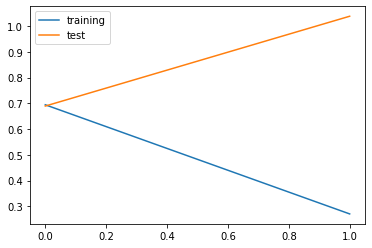

In [148]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [149]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    _ , y_pred = model(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)

0.5750798722044729


In [ ]:
torch.save(model, 'model.pt')

In [20]:
model = torch.load('/content/model.pt')

In [ ]:
model